## Airline Passenger Satisfaction
In this dataset, the analyst needs to know whether the variabels would affect between "neutral or dissatisfied" and "satisfied". The explanation of the variables as follows:
1. Gender: Gender of the passengers (Female, Male)
2. Customer Type: The customer type (Loyal customer, disloyal customer)
3. Age: The actual age of the passengers
4. Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
5. Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
6. Flight distance: The flight distance of this journey
7. Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
8. Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
9. Ease of Online booking: Satisfaction level of online booking
10. Gate location: Satisfaction level of Gate location
11. Food and drink: Satisfaction level of Food and drink
12. Online boarding: Satisfaction level of online boarding
13. Seat comfort: Satisfaction level of Seat comfort
14. Inflight entertainment: Satisfaction level of inflight entertainment
15. On-board service: Satisfaction level of On-board service
16. Leg room service: Satisfaction level of Leg room service
17. Baggage handling: Satisfaction level of baggage handling
18. Check-in service: Satisfaction level of Check-in service
19. Inflight service: Satisfaction level of inflight service
20. Cleanliness: Satisfaction level of Cleanliness
21. Departure Delay in Minutes: Minutes delayed when departure
22. Arrival Delay in Minutes: Minutes delayed when Arrival
23. Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

## Reading Data

In [1]:
# Import Library
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing

df = pd.read_csv ('https://raw.githubusercontent.com/ihsanmauri/Airline-Passenger-Satisfaction/main/airline.csv', sep = ';')

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [3]:
df.head(10)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


From the looks of it we can tell that "id" needs to be deleted, since it's not an important feature.

In [4]:
# Checking the Rows and Columns
df.shape

(129880, 24)

In [5]:
# Find missing values
import numpy as np
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

Arrival Delay in Minutes 0.003  % missing values
No missing value found


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
id                                   129880 non-null int64
Gender                               129880 non-null object
Customer Type                        129880 non-null object
Age                                  129880 non-null int64
Type of Travel                       129880 non-null object
Class                                129880 non-null object
Flight Distance                      129880 non-null int64
Inflight wifi service                129880 non-null int64
Departure/Arrival time convenient    129880 non-null int64
Ease of Online booking               129880 non-null int64
Gate location                        129880 non-null int64
Food and drink                       129880 non-null int64
Online boarding                      129880 non-null int64
Seat comfort                         129880 non-null int64
Inflight entertainment               129880 non-null int64


As you can see from above, there are several missing values on "Arrival Delay in Minutes" feature. Hence we need to check the sum of the missing value.

In [7]:
# Check for Missing Values
df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

Impute missing values

In [8]:
# Impute with Mean Value
mean = df['Arrival Delay in Minutes'].mean()

df['Arrival Delay in Minutes'].fillna(mean, inplace=True)

# Check for Missing Values
df.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
id                                   129880 non-null int64
Gender                               129880 non-null object
Customer Type                        129880 non-null object
Age                                  129880 non-null int64
Type of Travel                       129880 non-null object
Class                                129880 non-null object
Flight Distance                      129880 non-null int64
Inflight wifi service                129880 non-null int64
Departure/Arrival time convenient    129880 non-null int64
Ease of Online booking               129880 non-null int64
Gate location                        129880 non-null int64
Food and drink                       129880 non-null int64
Online boarding                      129880 non-null int64
Seat comfort                         129880 non-null int64
Inflight entertainment               129880 non-null int64


In [10]:
df = df.drop('id',axis=1)

Since "id" wont affect the calucation we need drop it

In [11]:
# Prints Descriptive Statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.0,844.0,1744.0,4983.0
Inflight wifi service,129880.0,2.728696,1.329340,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129880.0,3.057599,1.526741,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,129880.0,2.756876,1.401740,0.0,2.0,3.0,4.0,5.0
Gate location,129880.0,2.976925,1.278520,0.0,2.0,3.0,4.0,5.0
Food and drink,129880.0,3.204774,1.329933,0.0,2.0,3.0,4.0,5.0
Online boarding,129880.0,3.252633,1.350719,0.0,2.0,3.0,4.0,5.0
Seat comfort,129880.0,3.441361,1.319289,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,129880.0,3.358077,1.334049,0.0,2.0,4.0,4.0,5.0


Before dive deep further, we need to check if there's a feature with one-value

In [12]:
# Find feature with one-value
for column in df.columns:
    print(column,df[column].nunique())

Gender 2
Customer Type 2
Age 75
Type of Travel 2
Class 3
Flight Distance 3821
Inflight wifi service 6
Departure/Arrival time convenient 6
Ease of Online booking 6
Gate location 6
Food and drink 6
Online boarding 6
Seat comfort 6
Inflight entertainment 6
On-board service 6
Leg room service 6
Baggage handling 5
Checkin service 6
Inflight service 6
Cleanliness 6
Departure Delay in Minutes 466
Arrival Delay in Minutes 473
satisfaction 2


Great! There's none. After that, we need to see if there're features that contain binary or multi-category

In [13]:
# Categorical Exploration
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['satisfaction']))]
categorical_features

['Gender', 'Customer Type', 'Type of Travel', 'Class']

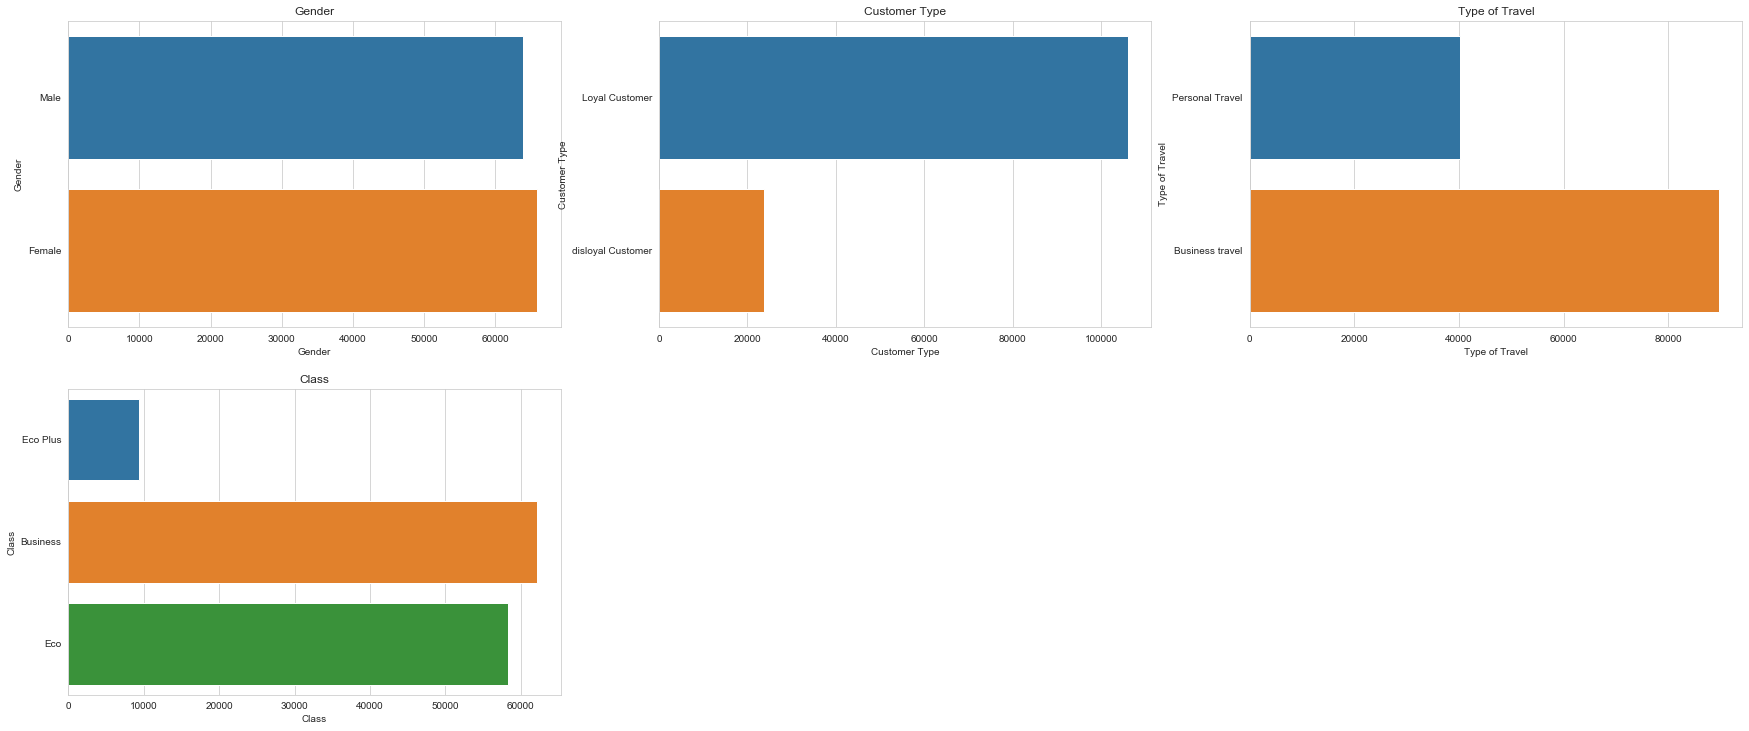

In [14]:
# Check count based on categorical features
plt.figure(figsize=(30,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sb.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

In [15]:
# List of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['satisfaction','']))]
print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  18


In [16]:
# Checking discrete
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 14


In [17]:
# Checking continuous
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['deposit']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 4


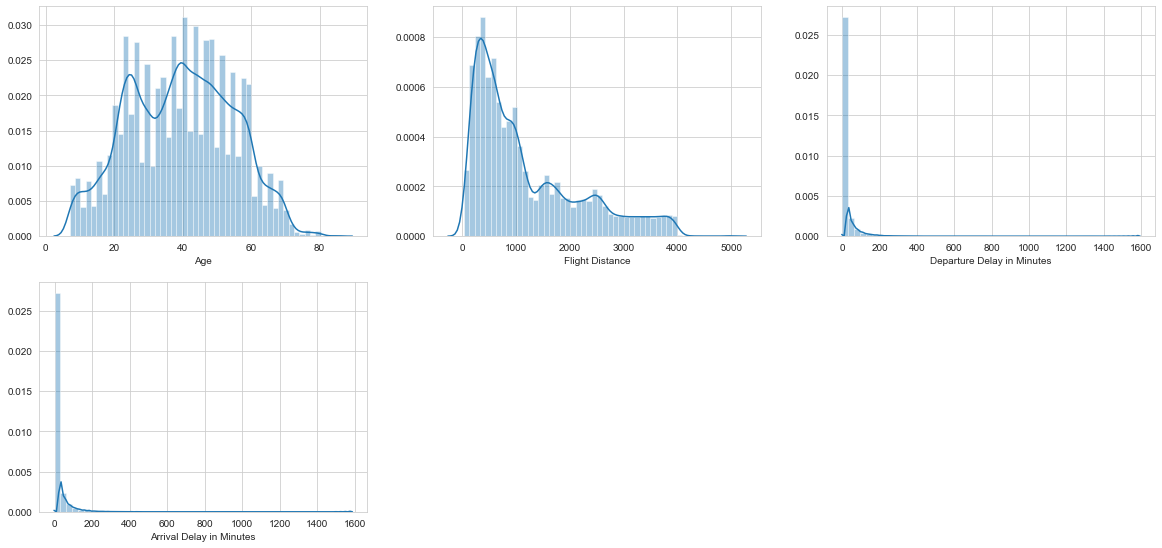

In [18]:
# Plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sb.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

In [19]:
# List of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['satisfaction','']))]
print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  18


OK, flight distance is kinda not distributedly normal, it's fine, we won't drop it. For Age, Departure Delay in Minutes, and Arrival Delay in Minutes are normal. But still we need to check if there's any outlier.

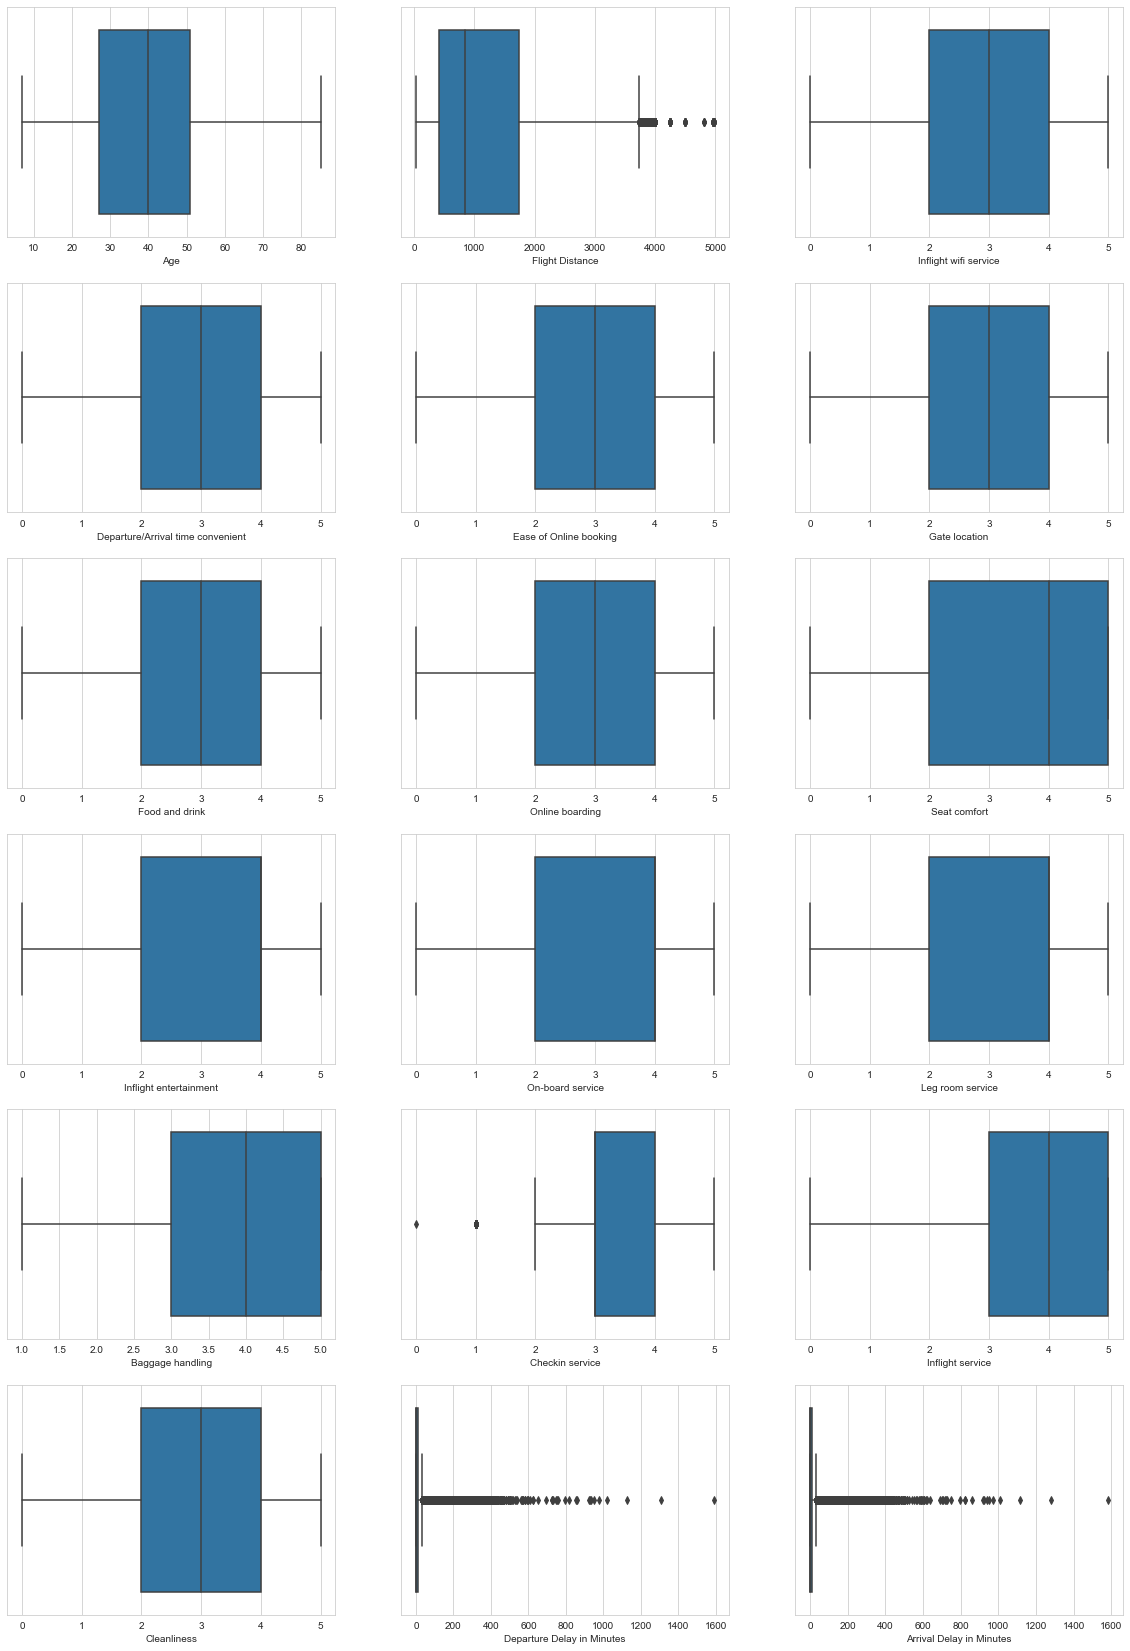

In [20]:
# Boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sb.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

Checkin Service there are only two, but for Flight Distance are several and we don't need to drop them

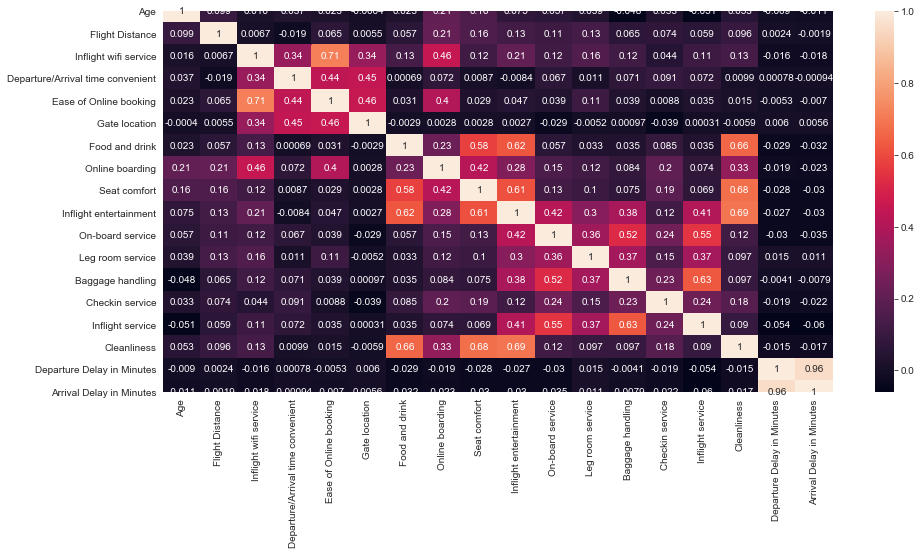

In [21]:
# Checking for correlation
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sb.heatmap(cor_mat,annot=True)

From the corr table above, the "Ease_of_Online_booking" is highly correlated with "Inflight_wifi_service", with 0.71 value. Also "Inflight_service" is highly correlated with "Baggage_handling", with 0.63 value, etc. But no pair is having corr. coefficient exactly equal to 1. Therefore we are not discarding any variable.

## Data Preprocessing
For this part we need to change the categorical variables to a dummy indicators

In [22]:
# Find the unique values from categorical features
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

Gender
['Male' 'Female']
Customer Type
['Loyal Customer' 'disloyal Customer']
Type of Travel
['Personal Travel' 'Business travel']
Class
['Eco Plus' 'Business' 'Eco']
satisfaction
['neutral or dissatisfied' 'satisfied']


1. Gender = binary 
2. Customer type = binary
3. Type of Travel = binary
4. Class = multi
5. Satisfaction = binary

In [23]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
gender_cat = df['Gender']
gender_encoded = label_encoder.fit_transform(gender_cat)
gender_encoded[0:5]

array([1, 1, 0, 0, 1])

In [24]:
customer_type_cat = df['Customer Type']
customer_type_encoded = label_encoder.fit_transform(customer_type_cat)
customer_type_encoded[0:5]

array([0, 1, 0, 0, 0])

In [25]:
type_of_travel_cat = df['Type of Travel']
type_of_travel_encoded = label_encoder.fit_transform(type_of_travel_cat)
type_of_travel_encoded[0:5]

array([1, 0, 0, 0, 0])

In [26]:
satisfaction_cat = df['satisfaction']
satisfaction_encoded = label_encoder.fit_transform(satisfaction_cat)
satisfaction_encoded[0:5]

array([0, 0, 1, 0, 1])

In [27]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Note: 
1. Male = 1 and Female = 0
2. Loyal = 0 and Disloyal = 1
3. Personal Travel = 1 and Business Travel = 0
4. neutral or dissatisfied = 0 and satisfied = 1

In [28]:
gender_DF = pd.DataFrame(gender_encoded, columns=['gender'])
gender_DF.head()

,gender
0,1
1,1
2,0
3,0
4,1


In [29]:
customer_type_DF = pd.DataFrame(customer_type_encoded, columns=['customer_type'])
customer_type_DF.head()

,customer_type
0,0
1,1
2,0
3,0
4,0


In [30]:
type_of_travel_DF = pd.DataFrame(type_of_travel_encoded, columns=['type_of_travel'])
type_of_travel_DF.head()

,type_of_travel
0,1
1,0
2,0
3,0
4,0


In [31]:
satisfaction_DF = pd.DataFrame(satisfaction_encoded, columns=['satisfaction'])
satisfaction_DF.head()

,satisfaction
0,0
1,0
2,1
3,0
4,1


After done with the binary, now for the multi

In [32]:
class_cat = df['Class']
class_encoded = label_encoder.fit_transform(class_cat)
class_encoded[0:100]

array([2, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 2, 0, 2, 0, 2, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 2, 2, 1,
       0, 1, 1, 0, 0, 2, 1, 1, 1, 0, 2, 0])

In [33]:
from sklearn.preprocessing import OneHotEncoder
binary_encoder = OneHotEncoder(categories='auto')
class_1hot = binary_encoder.fit_transform(class_encoded.reshape(-1,1))
class_1hot_mat = class_1hot.toarray()
class_DF = pd.DataFrame(class_1hot_mat, columns=['Eco','Eco Plus','Business'])
class_DF.head()

,Eco,Eco Plus,Business
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


Now we've done with one hot encoding, we need to drop the real columns

In [34]:
df.drop(['Gender','Customer Type','Type of Travel','Class','satisfaction'], axis=1, inplace=True)
df.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0


In [35]:
df_dmy = pd.concat([df, gender_DF, customer_type_DF, type_of_travel_DF, class_DF, satisfaction_DF], axis=1, verify_integrity=True).astype(float)
df_dmy[0:5]

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,gender,customer_type,type_of_travel,Eco,Eco Plus,Business,satisfaction
0,13.0,460.0,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,...,5.0,25.0,18.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,25.0,235.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,...,1.0,1.0,6.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,26.0,1142.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,...,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,25.0,562.0,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,...,2.0,11.0,9.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,61.0,214.0,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,...,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


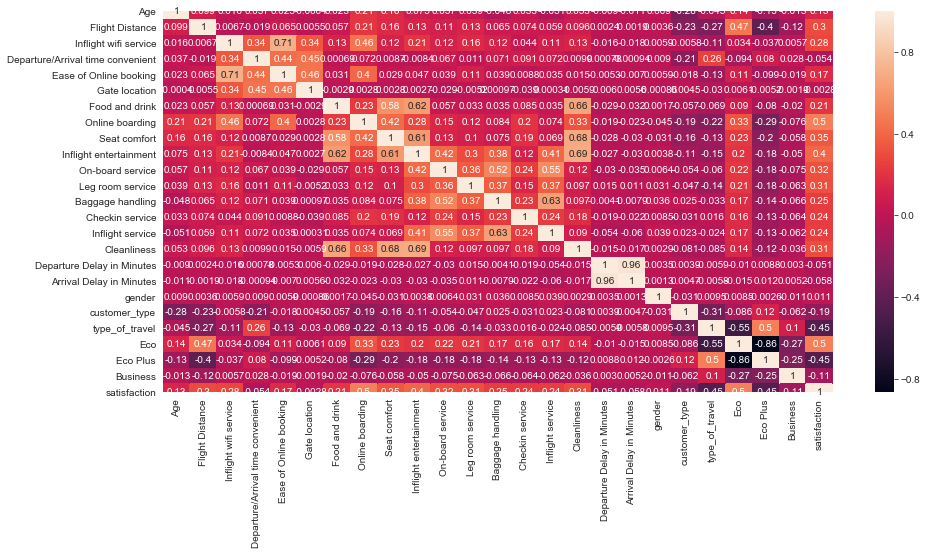

In [36]:
# Checking for correlation
cor_mat=df_dmy.corr()
fig = plt.figure(figsize=(15,7))
sb.heatmap(cor_mat,annot=True)

## Making Data Test & Training

In [37]:
X = df_dmy.drop(['satisfaction'],axis=1)
y = df_dmy['satisfaction']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [38]:
len(X_train)

103904

In [39]:
len(X_test)

25976

In [40]:
print("X_train {}\nX_test {}\ny_train {}\ny_test {}".format(X_train.shape,X_test.shape,y_train.shape,y_test.shape))

X_train (103904, 24)
X_test (25976, 24)
y_train (103904,)
y_test (25976,)


## Random Forest

In [41]:
#importing the libraries
from sklearn.ensemble import RandomForestClassifier

In [42]:
classifier1 = RandomForestClassifier(n_estimators=100,random_state=0)
classifier1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [43]:
y_pred_RF = classifier1.predict(X_test)

In [44]:
# Importing accuracy parameters
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred_RF))
print('\n\n\n')
print('Confusion matrix : \n{}'.format(confusion_matrix(y_test,y_pred_RF)))
print('\n')
print('Accuracy score : {}'.format(accuracy_score(y_test,y_pred_RF)))
acc_random_forest = accuracy_score(y_test,y_pred_RF)

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97     14657
         1.0       0.97      0.94      0.95     11319

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976





Confusion matrix : 
[[14329   328]
 [  687 10632]]


Accuracy score : 0.9609254696643055


## Naive Bayes

In [45]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [46]:
GNB = GaussianNB()
GNB.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [47]:
#Predicting on test set results
y_pred_GNB = GNB.predict(X_test)

In [48]:
# importing accuracy parameters
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred_GNB))
print('\n\n\n')
print('Confusion matrix : \n{}'.format(confusion_matrix(y_test,y_pred_GNB)))
print('\n')
print('Accuracy score : {}'.format(accuracy_score(y_test,y_pred_GNB)))
acc_gaussian_bayes = accuracy_score(y_test,y_pred_GNB)

              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87     14657
         1.0       0.84      0.81      0.82     11319

    accuracy                           0.85     25976
   macro avg       0.85      0.85      0.85     25976
weighted avg       0.85      0.85      0.85     25976





Confusion matrix : 
[[12916  1741]
 [ 2154  9165]]


Accuracy score : 0.8500538959039113


In [49]:
BNB = BernoulliNB(binarize=0.8)
BNB.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.8, class_prior=None, fit_prior=True)

In [50]:
#Predicting on test set results
y_pred_BNB = BNB.predict(X_test)

In [51]:
# importing accuracy parameters
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred_BNB))
print('\n\n\n')
print('Confusion matrix : \n{}'.format(confusion_matrix(y_test,y_pred_BNB)))
print('\n')
print('Accuracy score : {}'.format(accuracy_score(y_test,y_pred_BNB)))
acc_bernoulli_bayes = accuracy_score(y_test,y_pred_BNB)

              precision    recall  f1-score   support

         0.0       0.83      0.76      0.79     14657
         1.0       0.72      0.79      0.75     11319

    accuracy                           0.77     25976
   macro avg       0.77      0.78      0.77     25976
weighted avg       0.78      0.77      0.77     25976





Confusion matrix : 
[[11111  3546]
 [ 2351  8968]]


Accuracy score : 0.7729827533107484


In [52]:
MultiNB = MultinomialNB()
MultiNB.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [53]:
#Predicting on test set results
y_pred_MultiNB = MultiNB.predict(X_test)

In [54]:
# importing accuracy parameters
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred_MultiNB))
print('\n\n\n')
print('Confusion matrix : \n{}'.format(confusion_matrix(y_test,y_pred_MultiNB)))
print('\n')
print('Accuracy score : {}'.format(accuracy_score(y_test,y_pred_MultiNB)))
acc_multinomial_bayes = accuracy_score(y_test,y_pred_MultiNB)

              precision    recall  f1-score   support

         0.0       0.66      0.62      0.64     14657
         1.0       0.55      0.59      0.57     11319

    accuracy                           0.61     25976
   macro avg       0.61      0.61      0.61     25976
weighted avg       0.61      0.61      0.61     25976





Confusion matrix : 
[[9102 5555]
 [4611 6708]]


Accuracy score : 0.6086387434554974


Comparing Models Accuracy

In [55]:
print('Accuracy:\n')
print("Random Forest {}\nGaussian Bayes {}\nBernoulli Bayes {}\nMultinomial Bayes {}\n".format(acc_random_forest,acc_gaussian_bayes,acc_bernoulli_bayes,acc_multinomial_bayes))

Accuracy:

Random Forest 0.9609254696643055
Gaussian Bayes 0.8500538959039113
Bernoulli Bayes 0.7729827533107484
Multinomial Bayes 0.6086387434554974



That said, from the comparison above, the best model would be Random Forest

In [56]:
# Create Datafame Contains Fature and Result of prediction
df_dmy_compare = X_test.copy()
df_dmy_compare['ActualClass'] = y_test
df_dmy_compare['Random Forest'] = y_pred_RF
df_dmy_compare['GaussianNB'] = y_pred_GNB
df_dmy_compare['BernoulliNB'] = y_pred_BNB
df_dmy_compare['MultiNB'] = y_pred_MultiNB

In [57]:
df_dmy_compare.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,customer_type,type_of_travel,Eco,Eco Plus,Business,ActualClass,Random Forest,GaussianNB,BernoulliNB,MultiNB
125669,11.0,56.0,3.0,2.0,3.0,4.0,2.0,3.0,2.0,2.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
90648,49.0,2674.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
45322,52.0,1797.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
64084,28.0,680.0,5.0,5.0,5.0,5.0,1.0,2.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
71595,54.0,333.0,4.0,2.0,1.0,1.0,3.0,1.0,2.0,4.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


## Data Visualization

In [58]:
df_dmy_compare.groupby(['Random Forest'],sort=True)['Random Forest'].count()

Random Forest
0.0    15016
1.0    10960
Name: Random Forest, dtype: int64

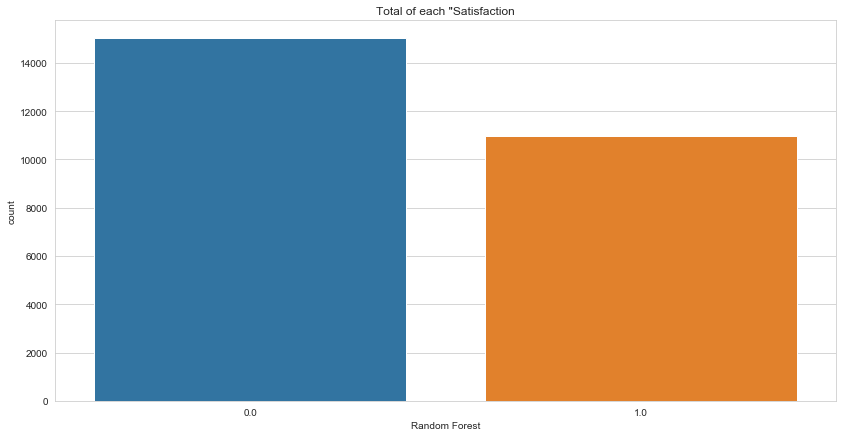

In [60]:
plt.figure(figsize=(14, 7))
plt.title('Total of each "Satisfaction')
sb.countplot(df_dmy_compare['Random Forest'])
plt.show()

## Conclusion
From testing the data above, we can tell that using Random Forest would be great for predicting Customer Satisfaction. Further note, it would be better if it added with more algorithms for improvement.

## Customer Analysis
Features below have high significance on prediction:
1. Ease of Online Booking against Inflight Wifi Service
2. Seat Comfort against Food & Drink
3. Inflight Entertainment against Food & Drink
4. Cleanliness against Food & Drink, Seat Comfort, Inflight Entertainment
5. Inflight Service against Baggage Handling
6. Online Booking, Eco Class against Satisfaction

Hence, if you want to improve the quality of services and the satisfaction, I suggest that these features need to be improved.